## Multi-Layer Perceptron & Delta Rule

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Global Variables

### XOR Truth Table

|x1| x2| XOR |
| --- | --- | --- |
|0|0|0|
|0|1|1|
|1|0|1|
|1|1|0|

In [2]:
xor = np.array([[0,0,0],
               [0,1,1],
               [1,0,1],
               [1,1,0]])

### Weights and Thresholds

In [3]:

w11 = 2
w12 = 2
w21 = 3
w22 = 3

t1 = -7
t2 = -5

In [4]:
#Weights and thresholds between hidden layer and output layer. 

w1 = -1
w2 = -1

t3 = -1

In [5]:
#desired outputs of neuron t1 in hidden layer
y1 = np.array([[1], [1], [0], [1]])

#desired outputs of neuron t2 in hidden layer
y2 = np.array([[1], [0], [1], [1]])

In [6]:
def mult_layer_per(x1,x2):
    
    # hidden layer
    z11 = w11*x1+w12*x2
    z12 = w21*x1+w22*x2
    
    if z11 >= t1:
        a11 = 1
    if z11 < t1:
        a11 = 0
        
    if z12 >= t2:
        a12 = 1
    if z12 < t2:
        a12 = 0
        
    # Output later
    z1 = w1*a11+w2*a12
    
    if z1 >= t3:
        o=1
    if z1 < t3:
        o=0    
        
    return a11,a12,o

In [7]:
def plott(title):
    
    plt.plot(xor[0,0], xor[0,1],marker='o',c='red')
    plt.plot(xor[1,0], xor[1,1],marker='o',c='green')
    plt.plot(xor[2,0], xor[2,1],marker='o',c='green')
    plt.plot(xor[3,0], xor[3,1],marker='o',c='red')
    
    plt.grid()
    
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.xlim(-1,2)
    plt.ylim(-1,2)
    
    plt.title(title)
    
    x1 = np.linspace(-0.5,1.5,10)
    
    # x1*w11+x2*w12=t1
    # x2 = -(w11/w12)*x1+t1/w12
    l1 = -(w11/w12)*x1+t1/w12
    l2 = -(w21/w22)*x1+t2/w22
    
    plt.plot(x1, l1, label='Hidden Neuron 1')
    plt.plot(x1, l2, label='Hidden Neuron 2')
    
    plt.legend()

In [8]:
def extract_data(i,xor):
    
    x1 = xor[i,0]
    x2 = xor[i,1]
    y  = xor[i,2]
    
    return x1,x2,y

In [9]:
def comparison():
    
    for i in range(xor.shape[0]):
        
        x1,x2,y = extract_data(i,xor)
        _,_,o   = mult_layer_per(x1,x2)
        
        # Display results
        print('--------------------')
        print('x1:{}'.format(x1))
        print('x2:{}'.format(x2))
        print()
        print('o :{}'.format(o))
        print('y :{}'.format(y))
        print()
              

In [10]:
def deltarule(alpha, num_epochs):
    
    global w11
    global w12
    global w21
    global w22
    global t1
    global t2

    # loop for num_epochs
    for i in range(num_epochs):
        
        # loop for row wise indexing of inputs and outputs
        for j in range(xor.shape[0]):
            
            x1,x2,y = extract_data(j,xor)
            a11,a12,o = mult_layer_per(x1,x2)
            
            error1 = y1[j,0]-a11
            error2 = y2[j,0]-a12
            
            delta_w11 = alpha*error1*x1
            delta_w12 = alpha*error1*x2
            
            delta_w21 = alpha*error2*x1
            delta_w22 = alpha*error2*x2
            
            delta_t1  = -alpha*error1
            delta_t2  = -alpha*error2
            
            print('------------------------------')
            print('Epoch: {}'.format(i) + 'Row: {}'.format(j))
            print()
            print('x1   : {}'.format(x1))
            print('x2   : {}'.format(x2))
            print('a11  : {}'.format(a11))
            print('a12  : {}'.format(a12))
            print('o    : {}'.format(o))
            print('y    : {}'.format(y))
            print()
            print('Errors')
            print('Error1: {}'.format(error1))
            print('Error2: {}'.format(error2))
            print()
            print('w11  : {}'.format(w11))
            print('w12  : {}'.format(w12))
            print('w21  : {}'.format(w21))
            print('w22  : {}'.format(w22))
            print('t1   : {}'.format(t1))
            print('t2   : {}'.format(t2))
            print()
            print('delta_w11  : {}'.format(delta_w11))
            print('delta_w12  : {}'.format(delta_w12))
            print('delta_w21  : {}'.format(delta_w21))
            print('delta_w22  : {}'.format(delta_w22))
            print('delta_t1   : {}'.format(delta_t1))
            print('delta_t2   : {}'.format(delta_t2))
            print()
            
            # Updating weights and thresholds
            
            w11 += delta_w11
            w12 += delta_w12
            w21 += delta_w21
            w22 += delta_w22
            
            t1  += delta_t1
            t2  += delta_t2
            
            print('w11  : {}'.format(w11))
            print('w12  : {}'.format(w12))
            print('w21  : {}'.format(w21))
            print('w22  : {}'.format(w22))
            print('t1   : {}'.format(t1))
            print('t2   : {}'.format(t2))
            print()

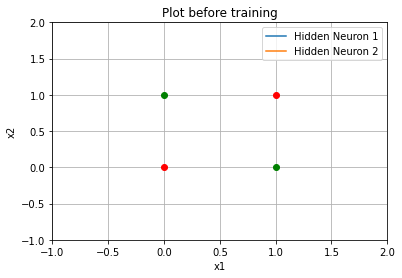

In [11]:
plott('Plot before training')

In [12]:
comparison()

--------------------
x1:0
x2:0

o :0
y :0

--------------------
x1:0
x2:1

o :0
y :1

--------------------
x1:1
x2:0

o :0
y :1

--------------------
x1:1
x2:1

o :0
y :0



In [13]:
num_epochs = 10
alpha = 0.5

deltarule(alpha, num_epochs)

------------------------------
Epoch: 0Row: 0

x1   : 0
x2   : 0
a11  : 1
a12  : 1
o    : 0
y    : 0

Errors
Error1: 0
Error2: 0

w11  : 2
w12  : 2
w21  : 3
w22  : 3
t1   : -7
t2   : -5

delta_w11  : 0.0
delta_w12  : 0.0
delta_w21  : 0.0
delta_w22  : 0.0
delta_t1   : -0.0
delta_t2   : -0.0

w11  : 2.0
w12  : 2.0
w21  : 3.0
w22  : 3.0
t1   : -7.0
t2   : -5.0

------------------------------
Epoch: 0Row: 1

x1   : 0
x2   : 1
a11  : 1
a12  : 1
o    : 0
y    : 1

Errors
Error1: 0
Error2: -1

w11  : 2.0
w12  : 2.0
w21  : 3.0
w22  : 3.0
t1   : -7.0
t2   : -5.0

delta_w11  : 0.0
delta_w12  : 0.0
delta_w21  : -0.0
delta_w22  : -0.5
delta_t1   : -0.0
delta_t2   : 0.5

w11  : 2.0
w12  : 2.0
w21  : 3.0
w22  : 2.5
t1   : -7.0
t2   : -4.5

------------------------------
Epoch: 0Row: 2

x1   : 1
x2   : 0
a11  : 1
a12  : 1
o    : 0
y    : 1

Errors
Error1: -1
Error2: 0

w11  : 2.0
w12  : 2.0
w21  : 3.0
w22  : 2.5
t1   : -7.0
t2   : -4.5

delta_w11  : -0.5
delta_w12  : -0.0
delta_w21  : 0.0
delta_w22  

In [14]:
comparison()

--------------------
x1:0
x2:0

o :0
y :0

--------------------
x1:0
x2:1

o :1
y :1

--------------------
x1:1
x2:0

o :1
y :1

--------------------
x1:1
x2:1

o :0
y :0



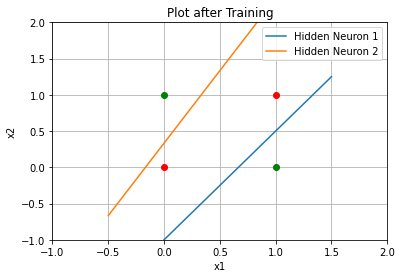

In [15]:
plott('Plot after Training')

In [17]:
for i in range(xor.shape[0]):
    
    x1,x2,y = extract_data(i,xor)
    a11,a12,o = mult_layer_per(x1,x2)
    
    print(np.c_[a11,a12])

[[1 1]]
[[1 0]]
[[0 1]]
[[1 1]]
